# Math Students

Since there is no clear, sure-fire way to analyze both datasets simultaneously, this notebook will contain the analyses for the Math Dataset only

## Importing Libraries & Data

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("student-mat.csv", sep = ';')

pd.options.display.max_columns = 100

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
df.shape

(395, 33)

In [6]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No null values

In [7]:
df.duplicated().sum()

0

No duplicate rows

## Checking outliers for Numeric Variables:

### Age:

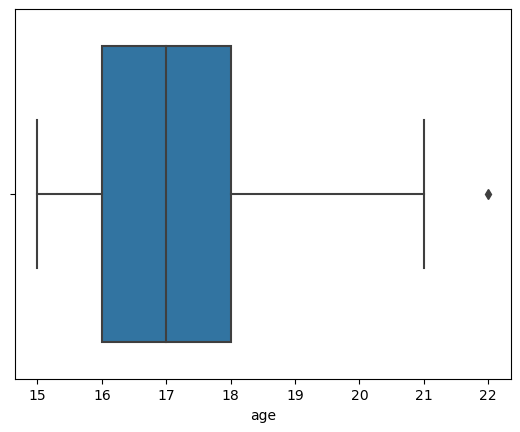

In [8]:
sns.boxplot(x='age',data=df);

Only an age of 22 is considered an anomolous result here.

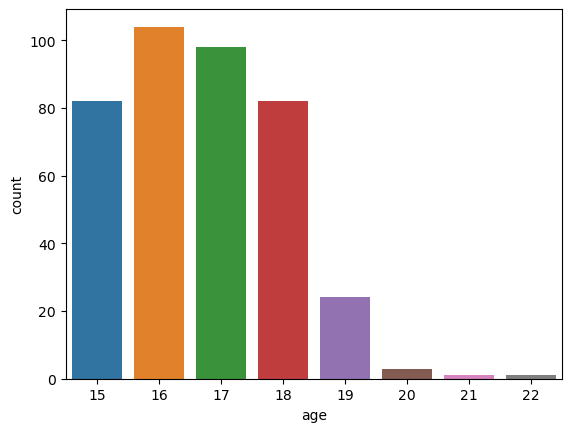

In [9]:
sns.countplot(x='age',data=df);

In [10]:
df[df['age']>19]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
247,GP,M,22,U,GT3,T,3,1,services,services,other,mother,1,1,3,no,no,no,no,no,no,yes,yes,5,4,5,5,5,1,16,6,8,8
306,GP,M,20,U,GT3,A,3,2,services,other,course,other,1,1,0,no,no,no,yes,yes,yes,no,no,5,5,3,1,1,5,0,17,18,18
376,MS,F,20,U,GT3,T,4,2,health,other,course,other,2,3,2,no,yes,yes,no,no,yes,yes,yes,5,4,3,1,1,3,4,15,14,15
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7


### Absences

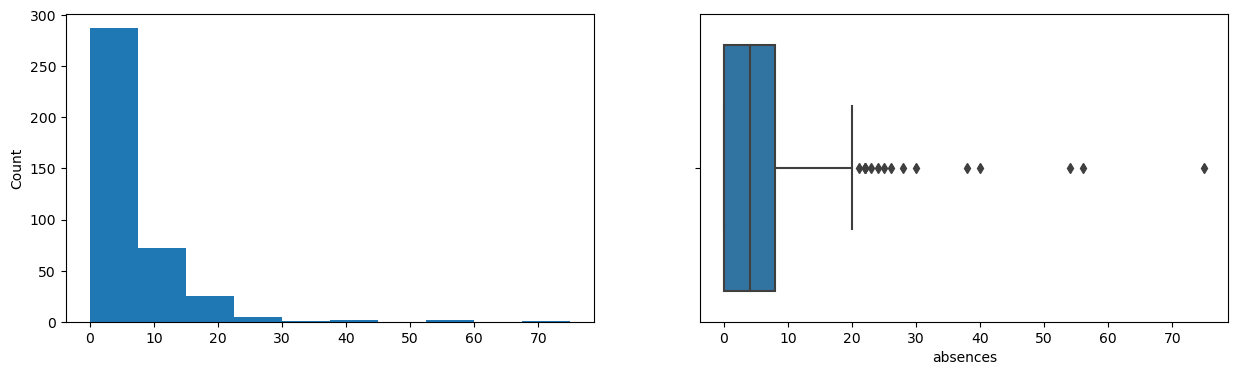

In [11]:
plt.figure(figsize = (15, 4))

#Histogram
plt.subplot(1, 2, 1)
df['absences'].hist(grid=False)
plt.ylabel('Count')

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['absences'])

plt.show()

In [12]:
df.describe()['absences']

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

Q1 = 0, Q3 = 8

Q3 - Q1 = 8-0 = 8

8 + 3(8) = 32

Any value above 32 absences is considered an **extreme outlier**

In [13]:
df[df['absences']>32]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
74,GP,F,16,U,GT3,T,3,3,other,services,home,mother,1,2,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,3,2,4,5,54,11,12,11
183,GP,F,17,U,LE3,T,3,3,other,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,yes,5,3,3,2,3,1,56,9,9,8
276,GP,F,18,R,GT3,A,3,2,other,services,home,mother,2,2,0,no,no,no,no,no,no,yes,yes,4,1,1,1,1,5,75,10,9,9
307,GP,M,19,U,GT3,T,4,4,teacher,services,reputation,other,2,1,1,no,yes,yes,no,yes,yes,yes,yes,4,3,4,1,1,4,38,8,9,8
315,GP,F,19,R,GT3,T,2,3,other,other,reputation,other,1,3,1,no,no,no,no,yes,yes,yes,yes,4,1,2,1,1,3,40,13,11,11


5 students are **extreme outliers** when it comes to absences.

In [14]:
df[df['absences']>20]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
40,GP,F,16,U,LE3,T,2,2,other,other,home,mother,2,2,1,no,yes,no,yes,no,yes,yes,yes,3,3,3,1,2,3,25,7,10,11
74,GP,F,16,U,GT3,T,3,3,other,services,home,mother,1,2,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,3,2,4,5,54,11,12,11
103,GP,F,15,U,GT3,T,3,2,services,other,home,mother,2,2,0,yes,yes,yes,no,yes,yes,yes,no,4,3,5,1,1,2,26,7,6,6
183,GP,F,17,U,LE3,T,3,3,other,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,yes,5,3,3,2,3,1,56,9,9,8
198,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,yes,yes,no,4,2,4,2,3,2,24,18,18,18
205,GP,F,17,U,GT3,T,3,4,at_home,services,home,mother,1,3,1,no,yes,yes,no,yes,yes,yes,yes,4,4,3,3,4,5,28,10,9,9
216,GP,F,17,U,GT3,T,4,3,other,other,reputation,mother,1,2,2,no,no,yes,no,yes,yes,yes,yes,3,4,5,2,4,1,22,6,6,4
260,GP,F,18,U,GT3,T,4,3,services,other,home,father,1,2,0,no,yes,yes,no,yes,yes,yes,yes,3,1,2,1,3,2,21,17,18,18
276,GP,F,18,R,GT3,A,3,2,other,services,home,mother,2,2,0,no,no,no,no,no,no,yes,yes,4,1,1,1,1,5,75,10,9,9
277,GP,M,18,U,GT3,T,4,4,teacher,services,home,mother,2,1,0,no,no,yes,yes,yes,yes,yes,no,3,2,4,1,4,3,22,9,9,9


### Failures

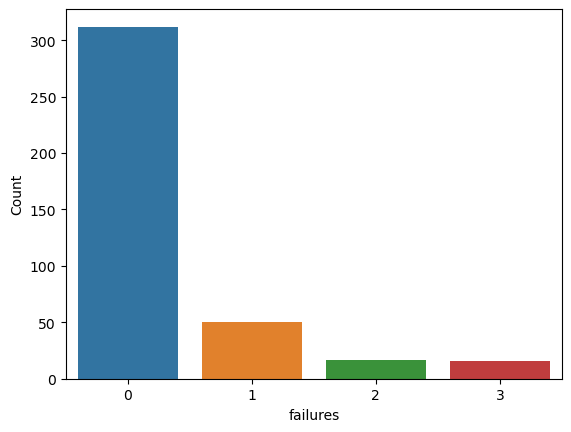

In [15]:
sns.countplot(x='failures', data=df);
plt.ylabel('Count');

Most students do not fail the class at all

Upon further consideration, failure is more of a categorical variable in nature

### G1, G2, & G3

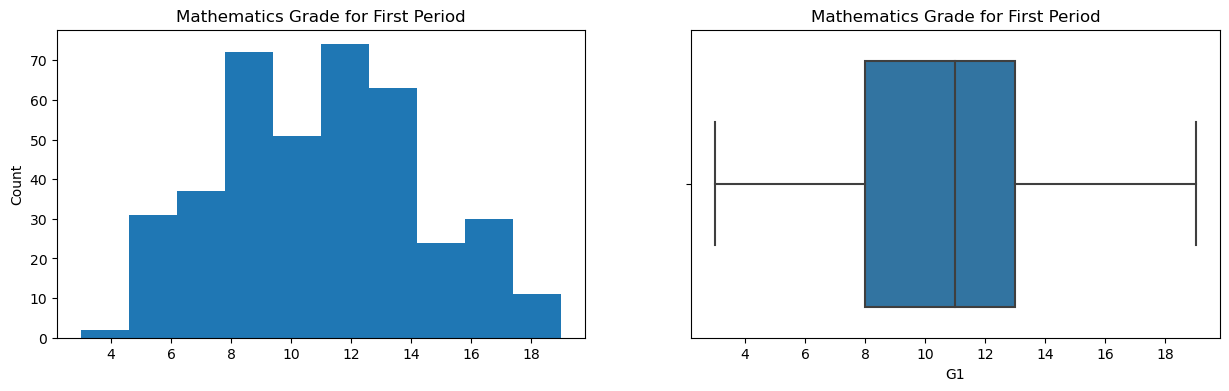

In [16]:
plt.figure(figsize = (15, 4))

#Histogram
plt.subplot(1, 2, 1)
plt.title('Mathematics Grade for First Period')
df['G1'].hist(grid=False)
plt.ylabel('Count')

#Boxplot
plt.subplot(1, 2, 2)
plt.title('Mathematics Grade for First Period')
sns.boxplot(x=df['G1'])

plt.show()

Grade Distribution for the First Period is Bimodal

In [17]:
'''
plt.figure(figsize = (15, 4))

#Histogram
plt.subplot(1, 2, 1)
plt.title('Mathematics Grade for Second Period')
df['G2'].hist(grid=False)
plt.ylabel('Count')

#Boxplot
plt.subplot(1, 2, 2)
plt.title('Mathematics Grade for Second Period')
sns.boxplot(x=df['G2'])

plt.show()
'''

"\nplt.figure(figsize = (15, 4))\n\n#Histogram\nplt.subplot(1, 2, 1)\nplt.title('Mathematics Grade for Second Period')\ndf['G2'].hist(grid=False)\nplt.ylabel('Count')\n\n#Boxplot\nplt.subplot(1, 2, 2)\nplt.title('Mathematics Grade for Second Period')\nsns.boxplot(x=df['G2'])\n\nplt.show()\n"

Grade distribution for the Second Period considers a score of 0 (obtained by ~15 students) an outlier

In [18]:
'''
plt.figure(figsize = (15, 4))

#Histogram
plt.subplot(1, 2, 1)
plt.title('Final Mathematics Grade')
df['G3'].hist(grid=False)
plt.ylabel('Count')

#Boxplot
plt.subplot(1, 2, 2)
plt.title("Final Mathematics Grade")
sns.boxplot(x=df['G3'])

plt.show()
'''

'\nplt.figure(figsize = (15, 4))\n\n#Histogram\nplt.subplot(1, 2, 1)\nplt.title(\'Final Mathematics Grade\')\ndf[\'G3\'].hist(grid=False)\nplt.ylabel(\'Count\')\n\n#Boxplot\nplt.subplot(1, 2, 2)\nplt.title("Final Mathematics Grade")\nsns.boxplot(x=df[\'G3\'])\n\nplt.show()\n'

With the excpetion of ~40 students obtaining a ZERO final grade, the grade distribution appears to follow a **normal distribution pattern**

In [19]:
df.describe()[['G1','G2','G3']]

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


All test scores are slightly negatively skewed (due to frequent ZERO scores)

In [20]:
df['school'].value_counts()

school
GP    349
MS     46
Name: count, dtype: int64

Vast majority of students are from 'Gabriel Pereira' school

### Pairplots:

In [21]:
#sns.pairplot(df, diag_kind="kde")
#plt.show()

Takes some time, not necessary. Need to clean up

## Categorical Variables

In [22]:
#for i in ['Medu', "Fedu", "traveltime", "studytime", "famrel", "freetime", "goout", "Dalc", "Walc", "health"]:
 #   plt.figure(figsize=(8,4));
  #  sns.countplot(x=i, data=df);
   # plt.title(f"Count plot of {i}");

# Encoding

In [23]:
#df.head(2)

In [24]:
#df.dtypes

All datatypes are of the correct type

In [25]:
#for i in df.columns:
 #   print(i, ":",sorted(df[i].unique()),',', len(df[i].unique()))

## Data Summary

### Numeric Variables 
- Age (Can be considered Categorical)
- Absences
- Failures *(Can also be considered Categorical - Number of past class failures from 0 to 4)*
- G1
- G2
- **G3** (target variable)

### Categorical Variables

#### Ordinal Varaibles
- Medu *(Mother's education level on a scale from 0 to 4)*
- Fedu *(Father's education level on a scale from 0 to 4)*
- Traveltime *(Travel time from home to school on a scale from 1 to 4, increasing in time)*
- Studytime *(Weekly Study time on a scale from 1 to 4)*
- Famrel *(Quality of family relationship on a scale from 1 to 5, increasing in quality)*
- Freetime *(Free time after school on a scale from 1 to 5)*
- Goout *(How often student goes out with friends on a scale from 1 to 5)*
- Dalc *(Workday alcohol consumption on a scale from 1 to 5)*
- Walc *(Weekend alcohol consumption on a scale from 1 to 5)*
- Health *(Current health status on a scale from 1 to 5)*


#### Binary Variables
- School *(GP or MS)*
- Sex *(M or F)*
- Address *(R - rural or U - urban)*
- FamSize *(Less than 3 people or Greater than 3 people)*
- PStatus *(T - parents living together or A - parents living apart)*
- SchoolsUp *(Extra educational support or not)*
- Famsup *(Family educational supoprt or not)*
- Paid *(Extra paid courses in the subject or not)*
- Activities *(Extra curricular activities or not)*
- Nursery *(Student attended nursery or not)*
- Higher *(Want to take Higher education or not)*
- Internet *(Has internet access at home or not)*
- Romantic *(In a romantic relationship or not)*

#### Other
- Mjob *(Mother's job)*
- Fjob *(Father's job)*
- Reason *(Reason to choose the school)*
- Guardian *(Student's guardian)*

## Features to be encoded:

### Ordinal (not necessary)
**(Will not be encoded yet, when building the model)**

### Binary:
**All values to be turned into 0s and 1s**

### Categorical Variables

In [26]:
binary_mapping = {
    'school': {'GP': 0, 'MS': 1},
    'sex': {'M': 0, 'F': 1},
    'address': {'R': 0, 'U': 1},
    'famsize': {'LE3': 0, 'GT3': 1},
    'Pstatus': {'A': 0, 'T': 1},
    'schoolsup': {'no': 0, 'yes': 1},
    'famsup': {'no': 0, 'yes': 1},
    'paid': {'no': 0, 'yes': 1},
    'activities': {'no': 0, 'yes': 1},
    'nursery': {'no': 0, 'yes': 1},
    'higher': {'no': 0, 'yes': 1},
    'internet': {'no': 0, 'yes': 1},
    'romantic': {'no': 0, 'yes': 1}
}

for column, mapping in binary_mapping.items():
    df[column] = df[column].map(mapping)

#df.head()

## Correlations:

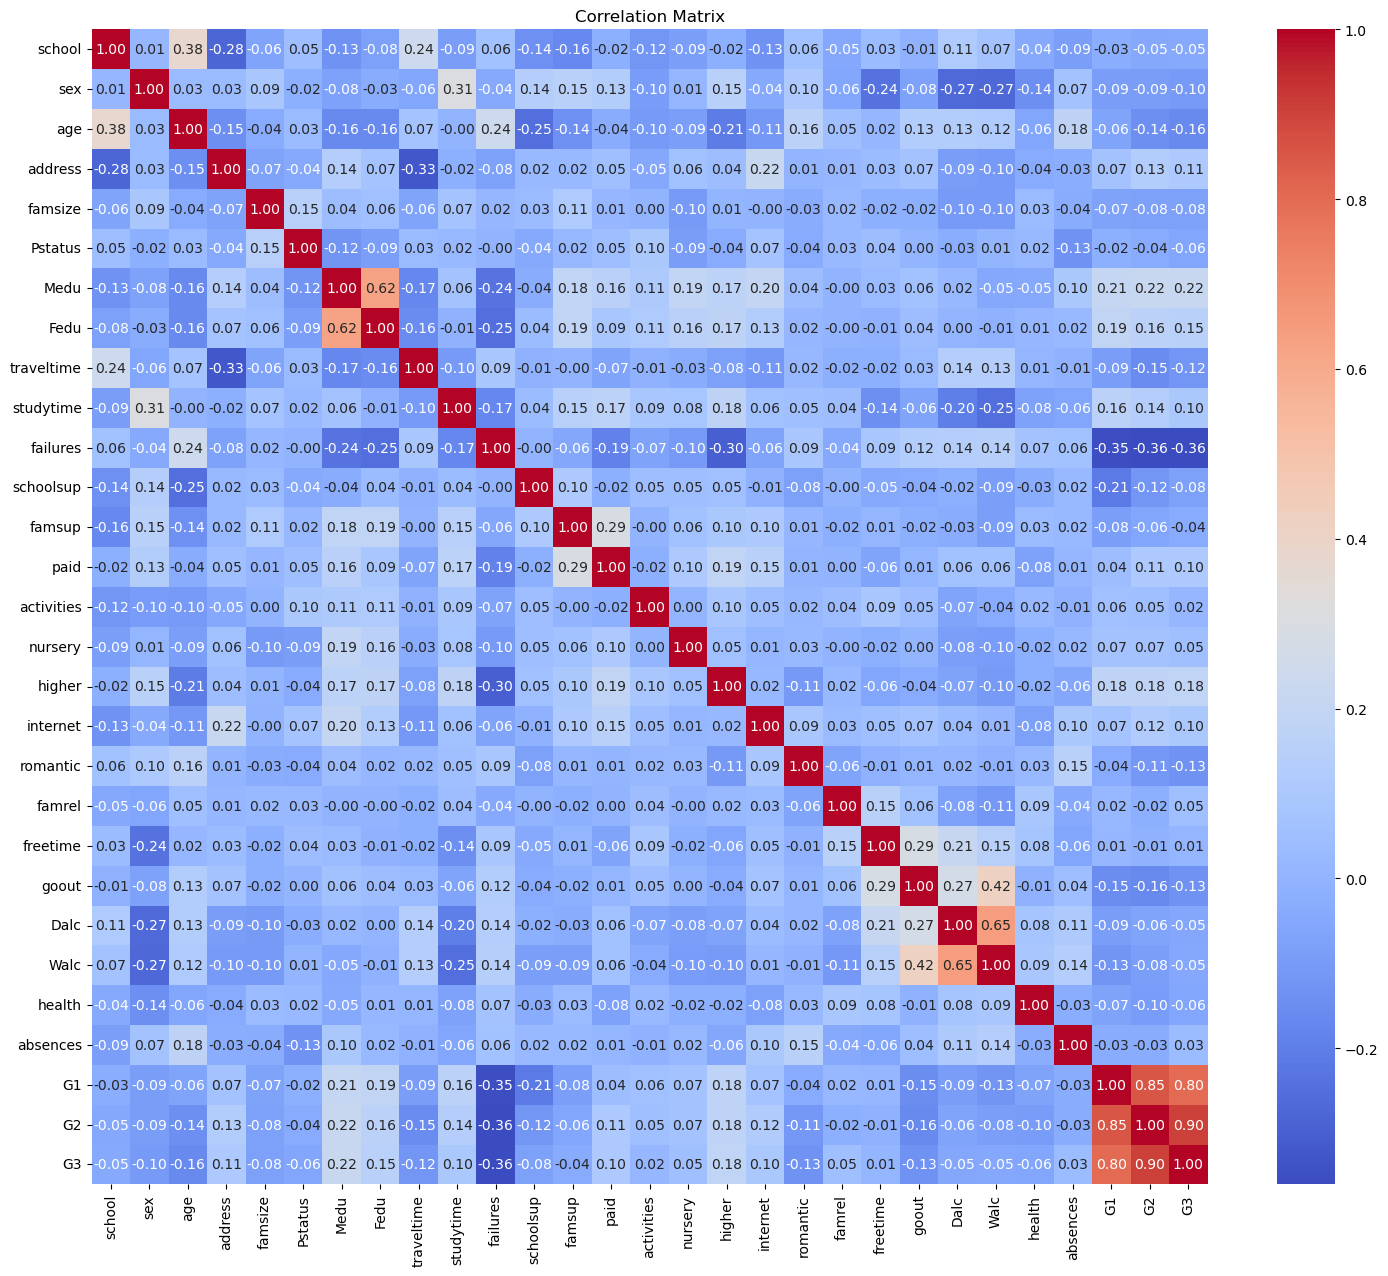

In [27]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Note to Self:
It is generally okay to include **categorical variables that have been mapped to numerical values** in a correlation matrix, but there are a few important considerations:

**Ordinal Variables**: If variables have an inherent order (e.g., education level: high school < college < graduate), then mapping them to numerical values *is appropriate*

**Binary Variables**: For binary categorical variables (e.g. sex (M/F)) it is also acceptable to map them to 0s and 1s

***HOWEVER***, when it comes to *nominal* variables (no inherent order, e.g., color) mapping them to numbers **can be misleading** since these categories are **simply labels** without a true numerical meaning

Using a correlation matrix is **not the most robust/comprehensive method** for **detecting multicollinearity**, however it is a good starting point, here are two methods that can be used instead:

1. Variance Inflation Factor (VIF):
2. PCA

## Analyzing more distributions:

In [28]:
'''
for column in df.columns:
    plt.figure(figsize=(6, 4))
    if df[column].dtype in ['int64', 'float64']:
        sns.histplot(df[column], kde=True, bins=20)
    else:
        sns.countplot(x=df[column])
    plt.title(f"Distribution of {column}")
    plt.show()
'''

'\nfor column in df.columns:\n    plt.figure(figsize=(6, 4))\n    if df[column].dtype in [\'int64\', \'float64\']:\n        sns.histplot(df[column], kde=True, bins=20)\n    else:\n        sns.countplot(x=df[column])\n    plt.title(f"Distribution of {column}")\n    plt.show()\n'

Very ugly plot + took a while to generate

##### Above code for numeric only:

In [29]:
'''
for column in ['absences', 'G1', 'G2', 'G3']:
    plt.figure(figsize=(6, 4))
    if df[column].dtype in ['int64', 'float64']:
        sns.histplot(df[column], kde=True, bins=20)
    else:
        sns.countplot(x=df[column])
    plt.title(f"Distribution of {column}")
    plt.show()
'''

'\nfor column in [\'absences\', \'G1\', \'G2\', \'G3\']:\n    plt.figure(figsize=(6, 4))\n    if df[column].dtype in [\'int64\', \'float64\']:\n        sns.histplot(df[column], kde=True, bins=20)\n    else:\n        sns.countplot(x=df[column])\n    plt.title(f"Distribution of {column}")\n    plt.show()\n'

In [30]:
#sns.pairplot(df, diag_kind="kde")
#plt.show()

Very ugly plot + took around 3 mins to generate, consider doing this before mapping binary variables to 0s and 1s 

In [31]:
target = 'G3'
X = df.drop(columns=[target])
y = df[target]

#### T-test (For Binary Variables)

In [32]:
from scipy.stats import ttest_ind

selected_features = []

binary_variables = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for var in binary_variables:
    group_0 = df[df[var] == 0][target]
    group_1 = df[df[var] == 1][target]
    
    t_stat, p_val = ttest_ind(group_0, group_1, equal_var=False)
    if p_val < 0.05:
        selected_features.append(var)
    
    print(f"Binary Variable: {var}, T-statistic: {t_stat:.4f}, P-value: {p_val:.4e}")

Binary Variable: school, T-statistic: 0.9555, P-value: 3.4313e-01
Binary Variable: sex, T-statistic: 2.0651, P-value: 3.9577e-02
Binary Variable: address, T-statistic: -2.1101, P-value: 3.6614e-02
Binary Variable: famsize, T-statistic: 1.6943, P-value: 9.1555e-02
Binary Variable: Pstatus, T-statistic: 1.2197, P-value: 2.2816e-01
Binary Variable: schoolsup, T-statistic: 2.3705, P-value: 1.9742e-02
Binary Variable: famsup, T-statistic: 0.7736, P-value: 4.3975e-01
Binary Variable: paid, T-statistic: -2.0831, P-value: 3.7901e-02
Binary Variable: activities, T-statistic: -0.3194, P-value: 7.4956e-01
Binary Variable: nursery, T-statistic: -1.0271, P-value: 3.0635e-01
Binary Variable: higher, T-statistic: -3.4474, P-value: 2.4400e-03
Binary Variable: internet, T-statistic: -1.9894, P-value: 4.9552e-02
Binary Variable: romantic, T-statistic: 2.5122, P-value: 1.2655e-02


#### ANOVA Tests (For categorical variables with 3+ groups)

In [33]:
from scipy.stats import f_oneway
from sklearn.feature_selection import f_classif

categorical_columns = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime' ,'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
for col in categorical_columns:
    groups = [y[X[col] == value] for value in X[col].unique()]
    f_stat, p_value = f_oneway(*groups)
    if p_value < 0.05:
        selected_features.append(col)

    print(f"Feature: {col}, F-statistic: {f_stat}, P-value: {p_value}")

Feature: Medu, F-statistic: 6.088435990706152, P-value: 9.241876816630144e-05
Feature: Fedu, F-statistic: 2.8905556373915777, P-value: 0.0221972905719672
Feature: Mjob, F-statistic: 3.7544596189013513, P-value: 0.005194749939407733
Feature: Fjob, F-statistic: 1.3029154881291376, P-value: 0.2683141692179647
Feature: reason, F-statistic: 2.0799920508343344, P-value: 0.10233745609730385
Feature: guardian, F-statistic: 1.5905172045230977, P-value: 0.2051326420058259
Feature: traveltime, F-statistic: 1.8397512190059848, P-value: 0.13937884626846256
Feature: studytime, F-statistic: 1.7278351054436039, P-value: 0.1607228096836598
Feature: famrel, F-statistic: 0.3974329754209522, P-value: 0.8104874341858186
Feature: freetime, F-statistic: 2.2245187381855573, P-value: 0.06574414402506515
Feature: goout, F-statistic: 3.1512156349464284, P-value: 0.014380078895198916
Feature: Dalc, F-statistic: 1.5836045063367645, P-value: 0.17786362227119418
Feature: Walc, F-statistic: 0.7331623695637165, P-valu

In [34]:
numerical_cols = ['age', 'absences', 'failures', 'G1', 'G2']

f_scores, p_values = f_classif(X[numerical_cols], y)

for col, f_score, p_value in zip(numerical_cols, f_scores, p_values):
    if p_value < 0.05:
        selected_features.append(col)
    print(f"Feature: {col}, F-score: {f_score}, P-value: {p_value}")

Feature: age, F-score: 1.3974325757283503, P-value: 0.13390861511378885
Feature: absences, F-score: 3.8104764843335723, P-value: 7.327590735682711e-07
Feature: failures, F-score: 6.115357817389258, P-value: 1.3461123075822662e-12
Feature: G1, F-score: 90.67748275328859, P-value: 1.2104889483171816e-121
Feature: G2, F-score: 145.93192897008356, P-value: 5.116876147076207e-154


In [35]:
print("Selected Features: ", selected_features)

Selected Features:  ['sex', 'address', 'schoolsup', 'paid', 'higher', 'internet', 'romantic', 'Medu', 'Fedu', 'Mjob', 'goout', 'absences', 'failures', 'G1', 'G2']


# First Model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Ensuring no multi-collinearity - make data frame with selected features + remove G1 & G2:

In [37]:
df_sfeatures = df[selected_features]
df_sfeatures_wo_G1_G2 = df_sfeatures.drop(columns=['G1', 'G2'])
df_sfeatures_wo_G1_G2.head()

,sex,address,schoolsup,paid,higher,internet,romantic,Medu,Fedu,Mjob,goout,absences,failures
0,1,1,1,0,1,0,0,4,4,at_home,4,6,0
1,1,1,0,0,1,1,0,1,1,at_home,3,4,0
2,1,1,1,1,1,1,0,1,1,at_home,2,10,3
3,1,1,0,1,1,1,1,4,2,health,2,2,0
4,1,1,0,1,1,0,0,3,3,other,2,4,0


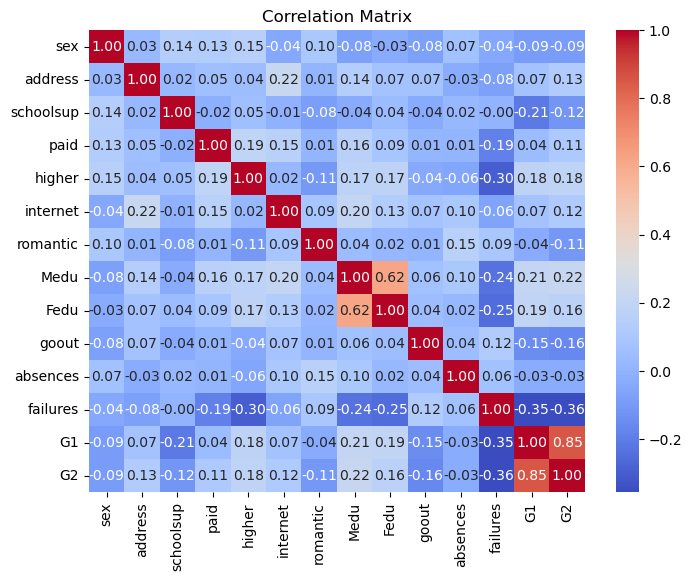

In [38]:
correlation_matrix = df_sfeatures.corr(numeric_only=True, method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [39]:
df_sfeatures_wo_G1_G2.drop(columns=['Fedu'], inplace=True)

Medu has a strong correlation with Fedu, the one with the weaker correlation with G3 (Fedu) can be removed before encoding

In [40]:
cat_cols_encode = ['Medu', 'Mjob', 'goout']
df_encoded = pd.get_dummies(df_sfeatures_wo_G1_G2, columns=cat_cols_encode, drop_first=True)

df_encoded[df_encoded.select_dtypes(include='bool').columns] = df_encoded.select_dtypes(include='bool').astype(int)
df_encoded['G3'] = df[target]
df_encoded.head()

,sex,address,schoolsup,paid,higher,internet,romantic,absences,failures,Medu_1,Medu_2,Medu_3,Medu_4,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,goout_2,goout_3,goout_4,goout_5,G3
0,1,1,1,0,1,0,0,6,0,0,0,0,1,0,0,0,0,0,0,1,0,6
1,1,1,0,0,1,1,0,4,0,1,0,0,0,0,0,0,0,0,1,0,0,6
2,1,1,1,1,1,1,0,10,3,1,0,0,0,0,0,0,0,1,0,0,0,10
3,1,1,0,1,1,1,1,2,0,0,0,0,1,1,0,0,0,1,0,0,0,15
4,1,1,0,1,1,0,0,4,0,0,0,1,0,0,1,0,0,1,0,0,0,10


In [41]:
X = df_encoded.iloc[:, :-1]
y = df[target]

In [42]:
X

,sex,address,schoolsup,paid,higher,internet,romantic,absences,failures,Medu_1,Medu_2,Medu_3,Medu_4,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,goout_2,goout_3,goout_4,goout_5
0,1,1,1,0,1,0,0,6,0,0,0,0,1,0,0,0,0,0,0,1,0
1,1,1,0,0,1,1,0,4,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,1,0,10,3,1,0,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,1,1,1,2,0,0,0,0,1,1,0,0,0,1,0,0,0
4,1,1,0,1,1,0,0,4,0,0,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,0,1,1,0,0,11,2,0,1,0,0,0,0,1,0,0,0,1,0
391,0,1,0,0,1,1,0,3,0,0,0,1,0,0,0,1,0,0,0,0,1
392,0,0,0,0,1,0,0,3,3,1,0,0,0,0,1,0,0,0,1,0,0
393,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [45]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 17.387579636031838
R-squared: 0.1520341597499868


# Passing all features in model (no encoding)

In [46]:
X = df.iloc[:, :-3]
y = df['G3']
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,1,18,1,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6
1,0,1,17,1,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4
2,0,1,15,1,0,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10
3,0,1,15,1,1,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2
4,0,1,16,1,1,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4


In [47]:
X = pd.get_dummies(X, columns = ['Mjob', 'Fjob', 'reason', 'guardian'], drop_first = True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 17.603737398324704
R-squared: 0.1414924741119583


Hyperparaemet tuning, gird search , random search
try xggboost
start building web app


Clearly, the predictions are heavily dependent on G1 and G2 scores. They provide the greatest insight to student performance

# Take 2

Main reason for low accuracy: Excluding G1 & G2 from the list of features passed in

In [49]:
df_sfeatures

,sex,address,schoolsup,paid,higher,internet,romantic,Medu,Fedu,Mjob,goout,absences,failures,G1,G2
0,1,1,1,0,1,0,0,4,4,at_home,4,6,0,5,6
1,1,1,0,0,1,1,0,1,1,at_home,3,4,0,5,5
2,1,1,1,1,1,1,0,1,1,at_home,2,10,3,7,8
3,1,1,0,1,1,1,1,4,2,health,2,2,0,15,14
4,1,1,0,1,1,0,0,3,3,other,2,4,0,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,0,1,1,0,0,2,2,services,4,11,2,9,9
391,0,1,0,0,1,1,0,3,1,services,5,3,0,14,16
392,0,0,0,0,1,0,0,1,1,other,3,3,3,10,8
393,0,0,0,0,1,1,0,3,2,services,1,0,0,11,12


1. Drop Fedu
2. Encode Medu, Mjob, goout

In [50]:
#Same code from above, just applied on df_sfeatures instead:

cat_cols_encode = ['Medu', 'Mjob', 'goout']
df_encoded = pd.get_dummies(df_sfeatures, columns=cat_cols_encode, drop_first=True)

df_encoded[df_encoded.select_dtypes(include='bool').columns] = df_encoded.select_dtypes(include='bool').astype(int)
df_encoded['G3'] = df[target]
df_encoded.head()

,sex,address,schoolsup,paid,higher,internet,romantic,Fedu,absences,failures,G1,G2,Medu_1,Medu_2,Medu_3,Medu_4,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,goout_2,goout_3,goout_4,goout_5,G3
0,1,1,1,0,1,0,0,4,6,0,5,6,0,0,0,1,0,0,0,0,0,0,1,0,6
1,1,1,0,0,1,1,0,1,4,0,5,5,1,0,0,0,0,0,0,0,0,1,0,0,6
2,1,1,1,1,1,1,0,1,10,3,7,8,1,0,0,0,0,0,0,0,1,0,0,0,10
3,1,1,0,1,1,1,1,2,2,0,15,14,0,0,0,1,1,0,0,0,1,0,0,0,15
4,1,1,0,1,1,0,0,3,4,0,6,10,0,0,1,0,0,1,0,0,1,0,0,0,10


In [51]:
X = df_encoded.iloc[:, :-1]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.263975198349233
R-squared: 0.7432839276334076


## Passing all features in (encoding only text data)

In [52]:
X = df.iloc[:, :-1]
y = df['G3']
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,1,18,1,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6
1,0,1,17,1,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5
2,0,1,15,1,0,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8
3,0,1,15,1,1,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14
4,0,1,16,1,1,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10


In [53]:
X = pd.get_dummies(X, columns = ['Mjob', 'Fjob', 'reason', 'guardian'], drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.656642833231226
R-squared: 0.7241341236974019
